# (실습) K-Means를 붓꽃 데이터에 적용하기 

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
iris = load_iris()

df_iris = pd.DataFrame(data=iris.data, columns=['sepal_length',
                                                'sepal_width','petal_length','petal_width'])
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(df_iris)

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [5]:
df_iris['cluster']=kmeans.labels_

In [6]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [7]:
df_iris['target'] = iris.target
iris_result = df_iris.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

df_iris['pca_1'] = pca_transformed[:,0]
df_iris['pca_2'] = pca_transformed[:,1]
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_1,pca_2
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


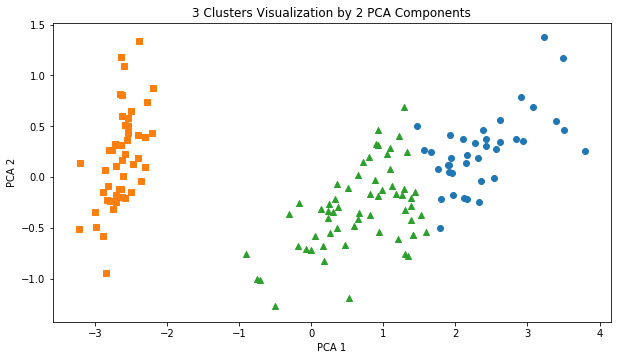

In [10]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = df_iris[df_iris['cluster']==0].index
marker1_ind = df_iris[df_iris['cluster']==1].index
marker2_ind = df_iris[df_iris['cluster']==2].index

plt.figure(figsize=(10, 5.5))

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=df_iris.loc[marker0_ind,'pca_1'], y=df_iris.loc[marker0_ind,'pca_2'], marker='o') 
plt.scatter(x=df_iris.loc[marker1_ind,'pca_1'], y=df_iris.loc[marker1_ind,'pca_2'], marker='s')
plt.scatter(x=df_iris.loc[marker2_ind,'pca_1'], y=df_iris.loc[marker2_ind,'pca_2'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


## 실루엣 계수 구하기 

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [18]:
score_samples = silhouette_samples(iris.data,df_iris['cluster'])

In [24]:
print('silhouette_samples() return shape',score_samples.shape)

silhouette_samples() return shape (150,)


In [21]:
df_iris['silhouette_coeff']= score_samples

In [22]:
average_score=silhouette_score(iris.data, df_iris['cluster'])
print('iris silhouette analysis score:{0:.3f} '.format(average_score))

iris silhouette analysis score:0.553 


In [23]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_1,pca_2,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397,0.852955
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001,0.815495
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949,0.829315
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299,0.805014
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755,0.849302


In [25]:
df_iris.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

### Clustering 알고리즘 테스트를 위한 데이터 생성 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [27]:
X, y = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=1.2, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(500, 2) (500,)
[0 1 2] [167 167 166]


In [28]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,1.128565,4.786175,0
1,-2.014034,3.787124,2
2,-2.135925,1.655626,2


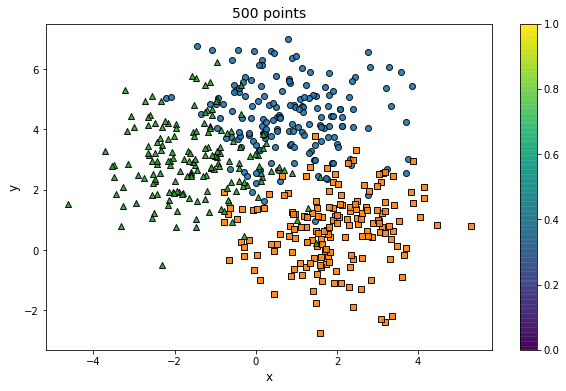

In [29]:
target_list = np.unique(y)
plt.figure(figsize=(10, 6))
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    
    plt.scatter(x=target_cluster['ftr1'], 
                y=target_cluster['ftr2'], 
                edgecolor='k', 
                marker=markers[target],
                alpha=0.9,
               )
    
plt.title('500 points', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.colorbar()
        
plt.show()

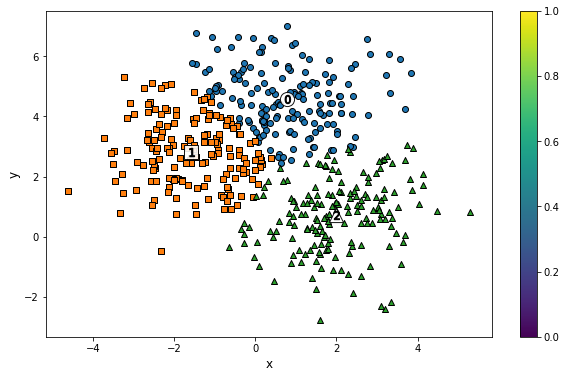

In [30]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

plt.figure(figsize=(10, 6))

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출

centers = kmeans.cluster_centers_

unique_labels = np.unique(cluster_labels)

markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    
    center_x_y = centers[label]
    
    plt.scatter(x=label_cluster['ftr1'], 
                y=label_cluster['ftr2'], 
                edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0],
                y=center_x_y[1], 
                s=200, color='white',
                alpha=0.9, 
                edgecolor='k', 
                marker=markers[label])
    
    plt.scatter(x=center_x_y[0], 
                y=center_x_y[1], 
                s=70, color='k', 
                edgecolor='k', 
                marker='$%d$' % label)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.colorbar()
plt.show()

In [31]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               141
        1                15
        2                11
1       2               155
        1                 7
        0                 5
2       1               144
        0                17
        2                 5
Name: kmeans_label, dtype: int64
